In [305]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow.compat.v1 as tf
#For Compatibility with older code.
tf.disable_eager_execution()

In [306]:
from sklearn.datasets import *
from sklearn.preprocessing import minmax_scale

In [307]:
features,target = make_blobs(n_samples = 100,n_features=2,centers=2,random_state=75,cluster_std = 5)

In [308]:
target = tf.keras.utils.to_categorical(target)

In [309]:
features = minmax_scale(features)
k = int(len(features)*0.6)

In [310]:
X_train,Y_train = features[0:k,:],target[0:k]
X_test,Y_test = features[k:,:],target[k:]

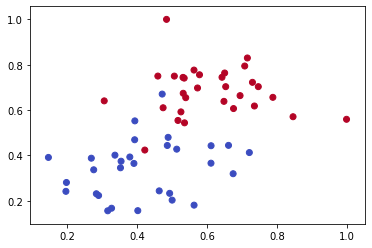

In [313]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train[:,1], cmap = "coolwarm")
plt.show()

In [314]:
# Define data size and batch size
n_samples = 1000 
batch_size = 100
n_features = 2

In [342]:
tf.reset_default_graph()


# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(None, n_features)) 
y = tf.placeholder(tf.float32, shape=(None, 2)) 


with tf.variable_scope("linear-regression", reuse=tf.AUTO_REUSE):
    W = tf.Variable(tf.zeros([2,2]))

    b = tf.Variable(tf.zeros([2])) 

    y_pred = tf.nn.sigmoid(tf.add(tf.matmul(X, W),b))


    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)

        
 

# Sample code to run full gradient descent:
# Define optimizer operation
opt_operation = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

with tf.Session() as sess:
# Initialize Variables in graph 
    sess.run(tf.initialize_all_variables()) 
    # Gradient descent loop for 500 steps 
    for _ in range(100):
        # Select random minibatch
        #indices = np.random.choice(len(X_train), batch_size)
        X_batch, y_batch = X_train, Y_train#.reshape(-1,1)
        # Do gradient descent step
        _, loss_val,p = sess.run([opt_operation, loss,y_pred], feed_dict={X: X_batch, y: y_batch})
        print (np.mean(loss_val, axis = 0))
        Weight = sess.run(W)
        Bias = sess.run(b)

[0.7240766 0.7240767]
[0.71491903 0.7201818 ]
[0.70671165 0.7164752 ]
[0.69969255 0.71298295]
[0.6939743 0.709719 ]
[0.6895389  0.70668095]
[0.686259  0.7038454]
[0.6839384  0.70117086]
[0.6823585 0.6986086]
[0.681315 0.696114]
[0.6806372  0.69365436]
[0.6801938 0.6912081]
[0.679889  0.6887623]
[0.67965686 0.68630904]
[0.6794514  0.68384475]
[0.6792425 0.6813684]
[0.6790093  0.67888206]
[0.67873794 0.67639077]
[0.67841905 0.6739019 ]
[0.67804545 0.67142516]
[0.6776126 0.6689717]
[0.6771161 0.6665529]
[0.6765532  0.66417944]
[0.6759214 0.6618603]
[0.6752183  0.65960085]
[0.67444307 0.6574032 ]
[0.6735952 0.6552651]
[0.67267483 0.65318125]
[0.6716837 0.6511443]
[0.6706255 0.6491463]
[0.66950446 0.647181  ]
[0.66832805 0.6452444 ]
[0.6671053 0.6433357]
[0.66584677 0.6414569 ]
[0.66456544 0.63961315]
[0.6632749 0.6378095]
[0.6619886 0.6360505]
[0.660719   0.63434047]
[0.6594759 0.6326803]
[0.6582642  0.63106924]
[0.6570845 0.6295053]
[0.65593135 0.6279844 ]
[0.6547944 0.6265033]
[0.6536592

In [336]:
Y_train# - 1 / (1 + np.exp(-X_batch.dot(np.array([[1,1],[1,1]]))+ np.array([2,2])))

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

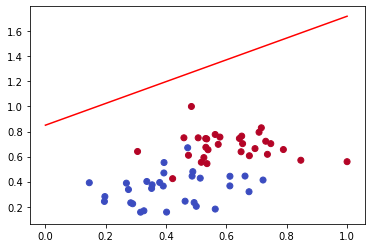

In [327]:
def linear_disc(x1,wx1,wx2,bias):
    return (-wx1*x1 + (-bias))/(wx2)


Weight_X1,Weight_X2 = Weight[1]

B = Bias[1]

g = np.linspace(0,1,10)
gp = linear_disc(g,Weight_X1,Weight_X2,B)
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train[:,1], cmap = "coolwarm")
plt.plot(g,gp, c = 'red')
plt.show()

In [321]:
Bias

array([ 16.910494, -20.851742], dtype=float32)

In [324]:
np.exp(0)

1.0